# Trabajo. Visualización de datos: consumo eléctrico de una vivienda.

En este trabajo, tenéis que completar algunos de los bloques de código para contestar a las preguntas que van apareciendo en el documento. 


Usaremos en este trabajo  los datos que ya exploramos en el trabajo sobre manipulación de datos y cálculo de resúmenes por grupos. El fichero es `household_hourly_power_consumption.txt`, que se puede descargar del aula virtual.

Empezamos por importar los módulos `pandas`, `pyplot` de `matplotlib`, y `path` de `os`, para tratar las  localizaciones de ficheros.

In [1]:
# Completar aquí: importar módulos
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from os import path
# --------------------


## Cargamos los datos
Definimos la variable `DATA_DIRECTORY` que indica dónde están situados nuestros datos respecto a la localización de este `notebook`.

In [2]:
# Completar aquí: definir DATA_DIRECTORY
DATA_DIRECTORY = path.abspath(path.join('..', 'data'))
DATA_DIRECTORY
# --------------------


'd:\\CodeProjects\\IDS\\data'

Podemos importar los datos en un `DataFrame` que llamaremos `vivienda`. Lo haremos especificando que la columna `date_hour` debe ser parseada como `datetime` y que la usaremos como `index`. Indicaremos la ubicación del fichero de datos usando `path.join` y la variable `DATA_DIRECTORY`.

In [3]:
# Completar aquí
file_path = path.join(DATA_DIRECTORY, "household_hourly_power_consumption.txt")
vivienda = pd.read_csv(file_path, sep=";", decimal=".", parse_dates=["date_hour"], skiprows=13, index_col="date_hour")
vivienda.dtypes

# --------------------
vivienda

,global_active_power,global_reactive_power,voltage,vlobal_intensity,sub_metering_1,sub_metering_2,sub_metering_3
date_hour,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


## Histograma de la potencia global activa
Empezaremos por representar un histograma de la potencia global activa, con 15 clases ("bins"). Este número de 15 se ha calculado usando la regla de Sturges.

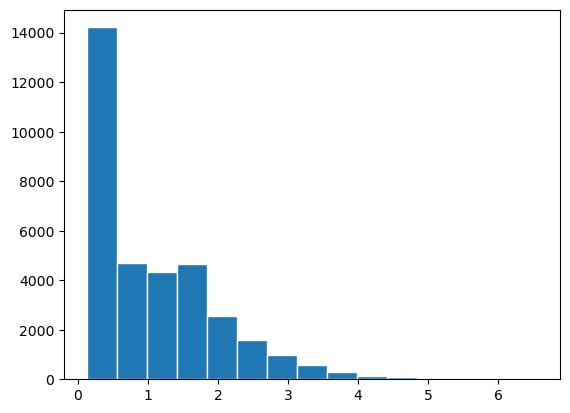

In [4]:
# Completar aquí
fig,ax = plt.subplots()
ax.hist(vivienda["global_active_power"].dropna(),bins=15,edgecolor="white");
# --------------------


## Boxplots del voltaje según los años.
Vamos a obtener ahora unos diagramas de cajabigotes del voltaje según cada año. Para ello, empezamos por obtener cuántos datos tenemos por año en el conjunto. 

In [5]:
# Completar aquí:
vivienda_year = vivienda.index.year.value_counts(sort=False)
vivienda_year
#ax.hist(vivienda["global_active_power"].dropna(),bins=15,edgecolor="white");
# --------------------


date_hour
2006     367
2007    8760
2008    8784
2009    8760
2010    7918
Name: count, dtype: int64

Nuestra intención es hacer una gráfica que contenga los diagramas de caja bigotes uno al lado del otro, donde el eje Ox es el eje de los años, de 2006 a 2010.

Para ello, tendremos que usar una lista que contenga las series de `voltage` año por año y pasarla a `ax.boxplot`.

C:\Users\andrew\AppData\Local\Temp\ipykernel_43592\1762755557.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(lista_voltaje, labels=vivienda_year.index);


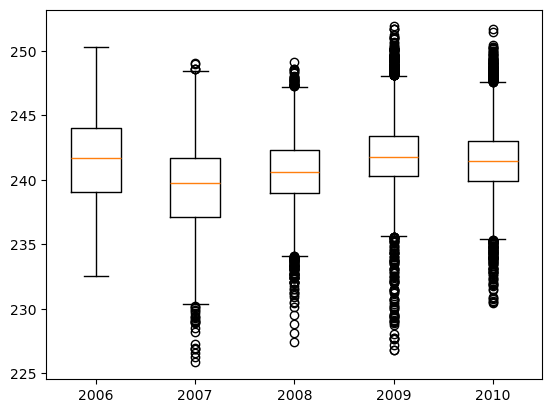

In [6]:
# Completar aquí
lista_voltaje = [vivienda[vivienda.index.year == year]["voltage"].dropna() for year in vivienda_year.index];
fig, ax = plt.subplots();
ax.boxplot(lista_voltaje, labels=vivienda_year.index);
# --------------------


In [7]:
lista_voltaje

[date_hour
 2006-12-16 17:00:00    234.643889
 2006-12-16 18:00:00    234.580167
 2006-12-16 19:00:00    233.232500
 2006-12-16 20:00:00    234.071500
 2006-12-16 21:00:00    237.158667
                           ...    
 2006-12-31 19:00:00    235.360667
 2006-12-31 20:00:00    235.495667
 2006-12-31 21:00:00    237.103833
 2006-12-31 22:00:00    239.298167
 2006-12-31 23:00:00    239.311667
 Name: voltage, Length: 367, dtype: float64,
 date_hour
 2007-01-01 00:00:00    241.361333
 2007-01-01 01:00:00    241.096500
 2007-01-01 02:00:00    243.200167
 2007-01-01 03:00:00    243.265667
 2007-01-01 04:00:00    242.456167
                           ...    
 2007-12-31 19:00:00    235.066833
 2007-12-31 20:00:00    238.032833
 2007-12-31 21:00:00    237.913500
 2007-12-31 22:00:00    240.893667
 2007-12-31 23:00:00    240.835667
 Name: voltage, Length: 8698, dtype: float64,
 date_hour
 2008-01-01 00:00:00    241.553000
 2008-01-01 01:00:00    240.830500
 2008-01-01 02:00:00    242.745500
 

Es posible (probable?) que, en vuestra gráfica, sólo aparezcan los años 2006 y 2008, a qué se podría deber? Cómo podríamos arreglarlo?

## Gráficas para la potencia global activa

Empezamos por representar la evolución temporal de la potencia global activa.

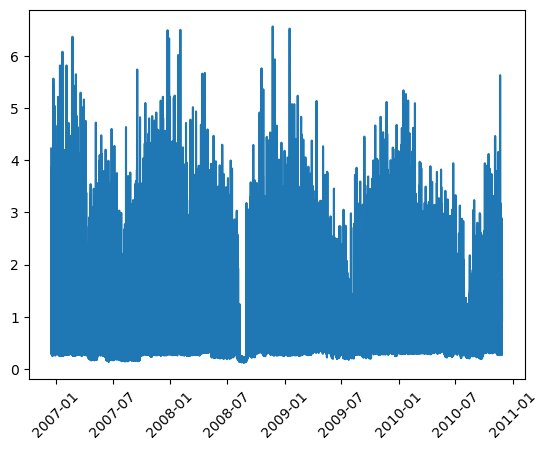

In [8]:
# Completar aquí
fig, ax = plt.subplots();
ax.plot(vivienda.index, vivienda["global_active_power"]);
plt.xticks(rotation=45)
plt.show();

# --------------------


Se observa algo destacable?

### Pequeñas modificaciones de la gráfica:

Realizad las modificaciones siguientes sobre la gráfica temporal:

1. Cambiad las etiquetas de los ejes: en el eje Ox, ponemos "Fecha", mientras que en el eje poned "Potencia global activa (kW).
2. Añadid el título "Evolución temporal de la potencia global activa consumida, 2006-2012"
3. Usando la función `savefig` de pyplot, guardad la gráfica en un fichero llamado potencia-global-activa-2006-2012.png en carpeta "figures" de vuestro directorio de trabajo para este trabajo. 


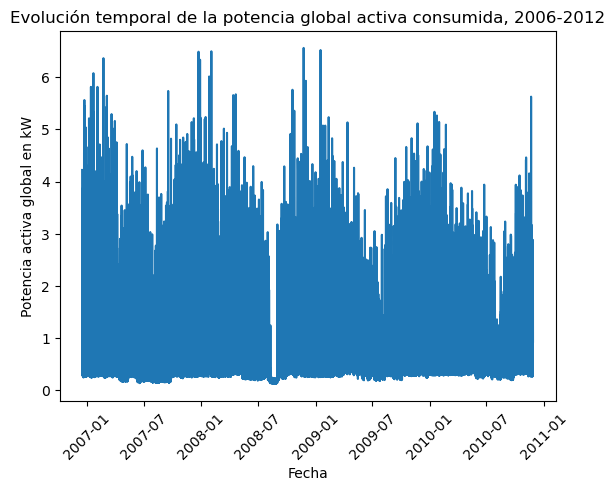

<Figure size 640x480 with 0 Axes>

In [9]:
# Completar aquí
fig, ax = plt.subplots();
ax.plot(vivienda.index, vivienda["global_active_power"]);
ax.set_xlabel("Fecha");
ax.set_ylabel("Potencia activa global en kW");
ax.set_title("Evolución temporal de la potencia global activa consumida, 2006-2012");
plt.xticks(rotation=45)
plt.show();
plt.savefig("potencia-global-activa-2006-2012.png")
# --------------------


### Seleccionamos los meses de julio a diciembre de 2008

Queremos realizar la misma gráfica pero si nos limitamos a los meses de julio hasta diciembre de 2008.
- Empezaremos por crear un `DataFrame` llamado `vivienda_2008` que sólo contenga las etiquetas de tiempo desde el 1 de julio de 2008 hasta el 31 de diciembre de 2008.
- Podemos usar `loc` para seleccionar etiquetas. Como el `index` es de tipo `datetime`, usaremos el constructor `datetime` del módulo `datetime`. Esta función nos permite construir una fecha especificando el año, mes y día, hora, mínuto, segundo. Ver su [documentación](https://docs.python.org/3/library/datetime.html#datetime.datetime)


In [10]:
# Completar aquí
from datetime import datetime
vivienda_2008 = vivienda.loc[datetime(2008,7,1):datetime(2008,12,31)]
# --------------------
print(f'Menor registro de tiempo: {vivienda_2008.index.min()}')
print(f'Mayor registro de tiempo: {vivienda_2008.index.max()}')
print(f'Número de registros: {vivienda_2008.shape[0]}')

Menor registro de tiempo: 2008-07-01 00:00:00
Mayor registro de tiempo: 2008-12-31 00:00:00
Número de registros: 4393


Hacemos la representación gráfica de la columna `global_active_power` de `vivienda_2008`.

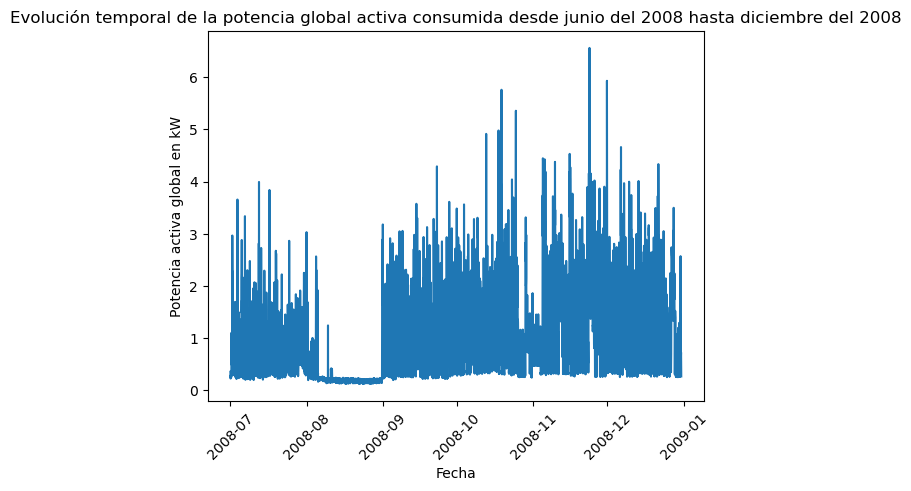

In [15]:
# Completar aquí
fig, ax = plt.subplots();
ax.plot(vivienda_2008.index, vivienda_2008["global_active_power"]);
ax.set_xlabel("Fecha");
ax.set_ylabel("Potencia activa global en kW");
ax.set_title("Evolución temporal de la potencia global activa consumida desde junio del 2008 hasta diciembre del 2008");
plt.xticks(rotation=45)
plt.show();
# --------------------


### Exploración del perfil horario de la potencia global consumida.


Vamos a explorar el perfil de evolución horario de la potencia global consumida.

Para ello, empezamos por construir un `DataFrame` que llamaremos *resumen_horario* y que
contenga el valor promedio de la potencia global activa consumida por hora (el promedio se hará, por hora, sobre todo
el conjunto `vivienda`).

`resumen_horario` tendrá por `index` la hora, y tendrá dos columnas `promedio`hora,  y n (el número de datos utilizado para calcular la media en cada grupo)

> Para obtener la hora de la columna `index` de `vivienda`, podréis usar el método 


In [11]:
# Completar aquí
resumen_horario = vivienda.groupby(vivienda.index.hour)["global_active_power"].agg(
    {   "mean",
        "count",
        }
    )
# --------------------
resumen_horario


,mean,count
date_hour,,
0,0.659562,1426
1,0.539325,1424
2,0.480618,1424
3,0.444850,1424
4,0.443844,1422
5,0.453674,1421
6,0.791606,1421
7,1.502373,1422
8,1.460940,1422


Podemos ahora representar gráficamente el perfil de evolución horario usando `resumen_horario`
(Global_active_power promedio en función de hora). Queremos hacerlo con barras verticales. 

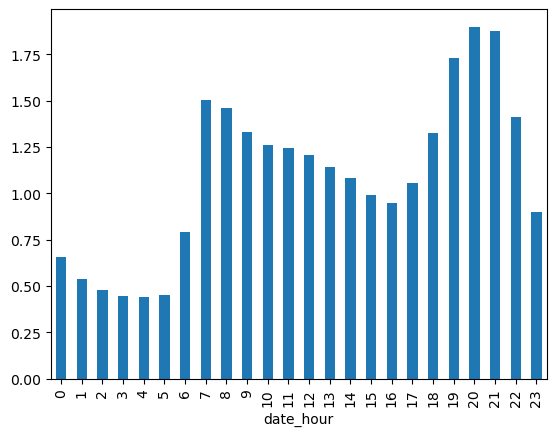

In [12]:
# Completar aquí
resumen_horario["mean"].plot(kind="bar");
# --------------------


### Opcional:
Podemos añadir el valor de la potencia calculada encima de cada barra en la gráfica

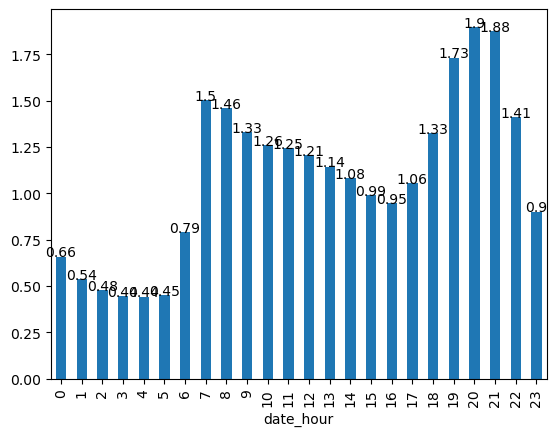

In [16]:
# Completar aquí
resumen_horario["mean"].plot(kind="bar");

for i in range(len(resumen_horario)):
    plt.text(i, resumen_horario.iloc[i]["mean"], round(resumen_horario.iloc[i]["mean"],2), ha="center") 
# Completar aquí
resumen_horario["mean"].plot(kind="bar");
plt.show()
# --------------------



# --------------------


Vamos a ver si el perfil de evolución horaria es diferente según los días de la semana. Para ello,
necesitamos crear un nuevo `Series` resumen, que se llamará `resumen_horario_dia`, y que contenga
el promedio  de la potencia global activa consumida si desglosamos los datos por hora *y por día de la semana*.
Empezamos por crear dos columnas `dia_semana` y `hora` en el DataFrame `vivienda` usando los atributos `weekday` y `hour` de su índice.



In [18]:
# Completar aquí
vivienda["dia_semana"] = vivienda.index.weekday
# --------------------
vivienda

,global_active_power,global_reactive_power,voltage,vlobal_intensity,sub_metering_1,sub_metering_2,sub_metering_3,dia_semana
date_hour,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,5
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,5
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,5
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,5
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,5
...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667,4
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000,4
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000,4


Calculamos ahora `resumen_horario_dia`.

In [19]:
# Completar aquí
resumen_horario_dia = vivienda.groupby(["dia_semana", vivienda.index.hour])["global_active_power"].agg(
    {   "mean",
        "count",
        }
    )
resumen_horario_dia.index.set_names(["dia_semana", "hora"], inplace=True)
# --------------------
resumen_horario_dia

mean  count
dia_semana hora                 
0          0     0.531491    203
           1     0.450318    203
           2     0.413212    203
           3     0.423549    203
           4     0.428248    203
...                   ...    ...
6          19    2.026754    202
           20    2.157163    202
           21    2.089381    203
           22    1.387676    203
           23    0.834612    203

[168 rows x 2 columns]

Aplicamos el método `reset_index` (referencia: [enlace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)) a `resumen_horario_dia`, para que el índice multinivel resultado de groupby dé lugar a dos columnas que correspondan a día de la semana y a hora del día. 

In [20]:
# Completar aquí
resumen_horario_dia.reset_index(inplace=True)
# --------------------
resumen_horario_dia

,dia_semana,hora,mean,count
0,0,0,0.531491,203
1,0,1,0.450318,203
2,0,2,0.413212,203
3,0,3,0.423549,203
4,0,4,0.428248,203
...,...,...,...,...
163,6,19,2.026754,202
164,6,20,2.157163,202
165,6,21,2.089381,203
166,6,22,1.387676,203


Procedemos a la representación gráfica

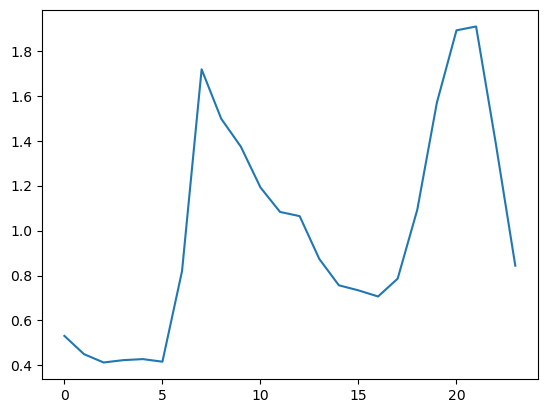

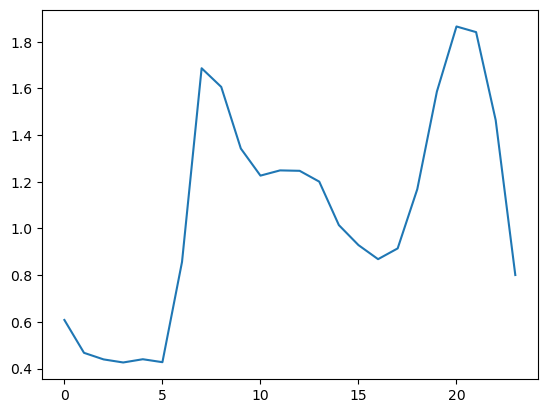

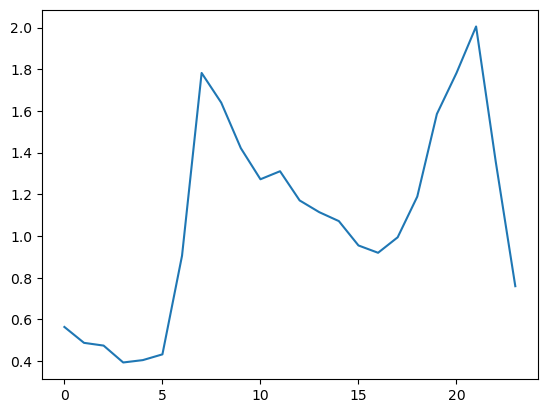

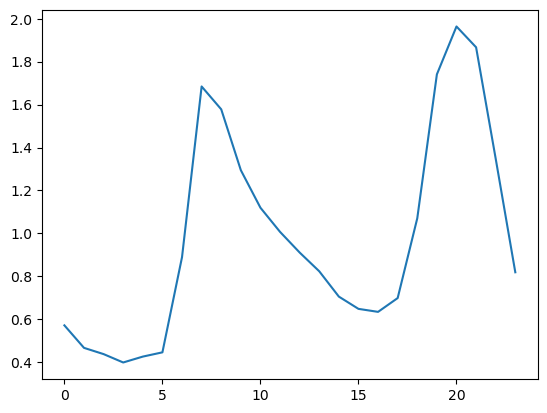

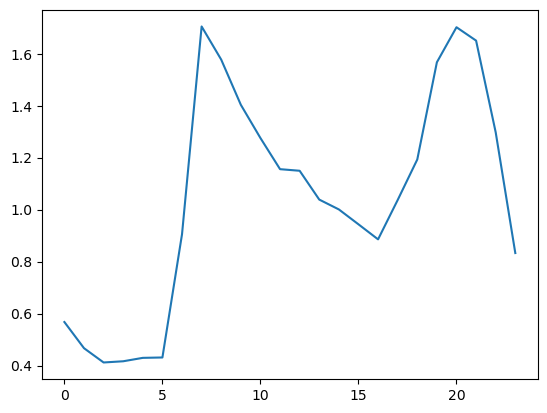

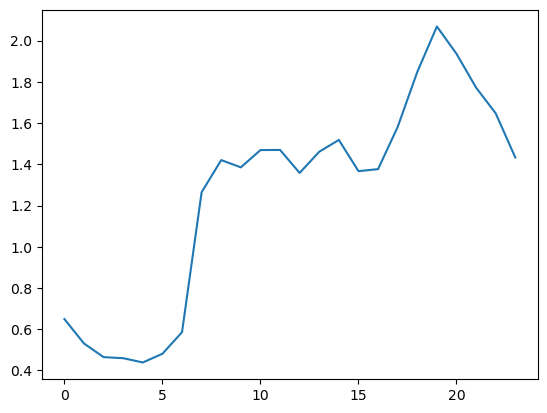

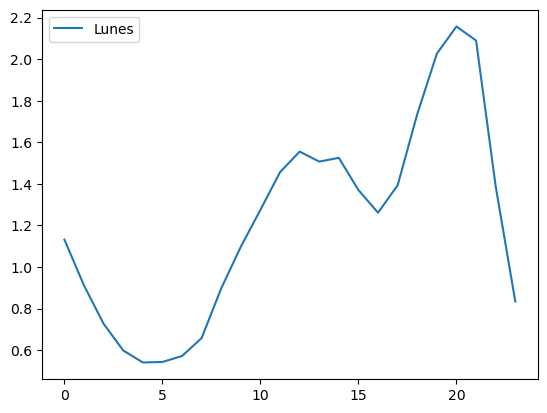

In [ ]:
# Completar aquí
dias = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
fig, ax = plt.subplots()
for i in range(len(dias)):
    ax.plot(resumen_horario_dia[resumen_horario_dia["dia_semana"] == i]["hora"], 
            resumen_horario_dia[resumen_horario_dia["dia_semana"] == i]["mean"], 
            label=dias[i])

ax.legend()
plt.show()

# --------------------



Qué conclusión sacáis sobre el patrón de consumo de la familia según lso días de la semana?